<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/05-kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Algoritmo k-Nearest Neighbors
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Ignacio Zambrano &bull; 21-12-2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de clasificación k-Nearest Neighbors (kNN) para predecir la clase de un conjunto de datos y también para predecir valores numéricos.

Los paquetes necesarios son:

In [17]:
# Paquetes necesarios
import numpy as np
import seaborn as sns
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización
import gdown

from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.datasets import make_blobs # Dataset
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Algoritmo k-NN
from sklearn.neighbors import KNeighborsClassifier


---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

1.  Cargar el conjunto de datos

In [18]:
url = "https://drive.google.com/uc?id=1zBu79031KDxexYedgjMUyAi1ixEn-5sY"
output = "nanotox_dataset.csv"

gdown.download(url, output, quiet=False)

# Cargamos el dataset
df = pd.read_csv(output)

print("Dimensión del dataset:", df.shape)
print("\nColumnas:")
print(df.columns.tolist())

Downloading...
From: https://drive.google.com/uc?id=1zBu79031KDxexYedgjMUyAi1ixEn-5sY
To: c:\Users\ignaz\OneDrive\Desktop\Quinto semestre\apendizaje automatico\AprendizajeAutomatico\nanotox_dataset.csv
100%|██████████| 44.1k/44.1k [00:00<00:00, 781kB/s]

Dimensión del dataset: (881, 11)

Columnas:
['NPs', 'coresize', 'hydrosize', 'surfcharge', 'surfarea', 'Ec', 'Expotime', 'dosage', 'e', 'NOxygen', 'class']


Analisis rápido

In [19]:
# Tipos y nulos
print("\nINFO:")
print(df.info())

print("\nNulos por columna:")
print(df.isna().sum().sort_values(ascending=False))

# Duplicados
print("\nDuplicados:", df.duplicated().sum())

# Revisión de valores únicos en variables clave
for col in ["NPs", "class"]:
    if col in df.columns:
        print(f"\nValores únicos en {col} (top 20):")
        display(df[col].value_counts().head(20))

# Estadísticos descriptivos solo numéricos
num_df = df.select_dtypes(include=[np.number])
print("\nResumen numérico (describe):")
display(num_df.describe().T)

# Intento de detectar columnas numéricas guardadas como texto
obj_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("\nColumnas tipo object:", obj_cols)




INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NPs         881 non-null    object 
 1   coresize    881 non-null    float64
 2   hydrosize   881 non-null    float64
 3   surfcharge  881 non-null    float64
 4   surfarea    881 non-null    float64
 5   Ec          881 non-null    float64
 6   Expotime    881 non-null    int64  
 7   dosage      881 non-null    float64
 8   e           881 non-null    float64
 9   NOxygen     881 non-null    int64  
 10  class       881 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 75.8+ KB
None

Nulos por columna:
NPs           0
coresize      0
hydrosize     0
surfcharge    0
surfarea      0
Ec            0
Expotime      0
dosage        0
e             0
NOxygen       0
class         0
dtype: int64

Duplicados: 487

Valores únicos en NPs (top 20):


NPs
ZnO      594
TiO2     200
CuO       51
Al2O3     18
Fe2O3     18
Name: count, dtype: int64


Valores únicos en class (top 20):


class
Toxic       476
nonToxic    405
Name: count, dtype: int64


Resumen numérico (describe):


,count,mean,std,min,25%,50%,75%,max
coresize,881.0,56.313280,33.700297,7.50000,32.00,45.30,86.00,125.00
hydrosize,881.0,513.781385,346.601373,74.00000,273.40,327.00,687.00,1843.00
surfcharge,881.0,1.642111,25.635780,-41.60000,-11.70,-9.30,29.40,42.80
surfarea,881.0,42.074075,47.111739,7.00000,15.00,24.10,42.50,210.00
Ec,881.0,-4.018127,0.509806,-5.17000,-4.16,-3.89,-3.89,-1.51
Expotime,881.0,27.459705,19.534667,3.00000,12.00,24.00,24.00,72.00
dosage,881.0,39.651270,38.163289,0.00001,10.00,25.00,50.00,300.00
e,881.0,1.646050,0.089304,1.54000,1.65,1.65,1.65,1.90
NOxygen,881.0,1.308740,0.543581,1.00000,1.00,1.00,2.00,3.00



Columnas tipo object: ['NPs', 'class']


2. Mostrar Datos

In [20]:
print("\nPrimeras filas del dataset:")
display(df.head())

print("\nDescripción estadística (variables numéricas):")
display(df.describe())


Primeras filas del dataset:


,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
0,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.001,1.61,3,nonToxic
1,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.010,1.61,3,nonToxic
2,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.100,1.61,3,nonToxic
3,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,1.000,1.61,3,nonToxic
4,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,5.000,1.61,3,nonToxic



Descripción estadística (variables numéricas):


,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,56.313280,513.781385,1.642111,42.074075,-4.018127,27.459705,39.651270,1.646050,1.308740
std,33.700297,346.601373,25.635780,47.111739,0.509806,19.534667,38.163289,0.089304,0.543581
min,7.500000,74.000000,-41.600000,7.000000,-5.170000,3.000000,0.000010,1.540000,1.000000
25%,32.000000,273.400000,-11.700000,15.000000,-4.160000,12.000000,10.000000,1.650000,1.000000
50%,45.300000,327.000000,-9.300000,24.100000,-3.890000,24.000000,25.000000,1.650000,1.000000
75%,86.000000,687.000000,29.400000,42.500000,-3.890000,24.000000,50.000000,1.650000,2.000000
max,125.000000,1843.000000,42.800000,210.000000,-1.510000,72.000000,300.000000,1.900000,3.000000


3. Escalamiento de los datos

In [21]:
# Seleccionamos SOLO variables numéricas (excluimos 'class' y 'NPs')
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("\nColumnas numéricas utilizadas para clustering:")
print(num_cols)

# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])

# Convertimos a DataFrame para mejor lectura
df_scaled = pd.DataFrame(X_scaled, columns=num_cols)

print("\nPrimeras filas de los datos escalados:")
display(df_scaled.head())



Columnas numéricas utilizadas para clustering:
['coresize', 'hydrosize', 'surfcharge', 'surfarea', 'Ec', 'Expotime', 'dosage', 'e', 'NOxygen']

Primeras filas de los datos escalados:


,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen
0,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-1.039554,-0.403904,3.113097
1,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-1.039318,-0.403904,3.113097
2,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-1.036958,-0.403904,3.113097
3,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-1.013362,-0.403904,3.113097
4,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-0.908490,-0.403904,3.113097



### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


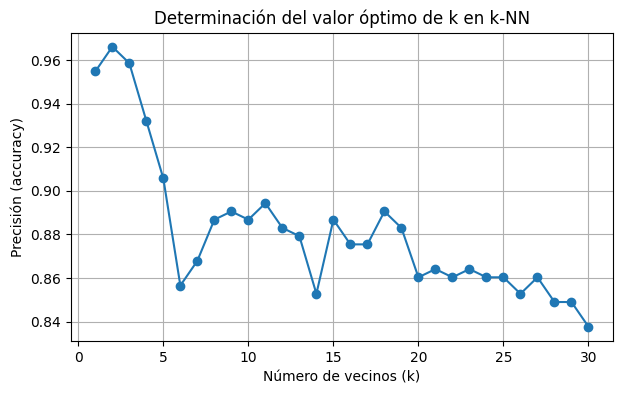

(2, 0.9660377358490566)

In [22]:
# Variables predictoras y objetivo
X = df_scaled
y = df['class']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Rango de k a evaluar
k_values = range(1, 31)
accuracies = []

# Entrenamiento y evaluación para cada k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Gráfica k vs precisión
plt.figure(figsize=(7, 4))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Precisión (accuracy)")
plt.title("Determinación del valor óptimo de k en k-NN")
plt.grid(True)
plt.show()

# Mejor k
best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)

best_k, best_acc


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

Accuracy: 0.9660377358490566


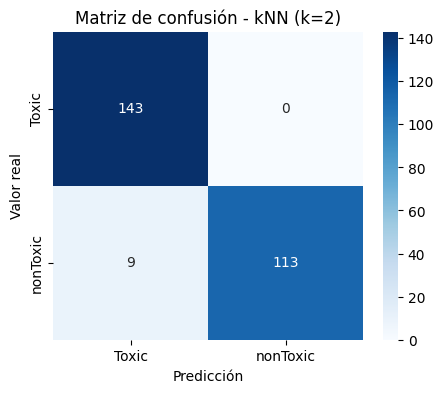

Reporte de clasificación:
              precision    recall  f1-score   support

       Toxic       0.94      1.00      0.97       143
    nonToxic       1.00      0.93      0.96       122

    accuracy                           0.97       265
   macro avg       0.97      0.96      0.97       265
weighted avg       0.97      0.97      0.97       265



In [23]:
# Entreno el modelo con el k óptimo
k_opt = 2
knn_final = KNeighborsClassifier(n_neighbors=k_opt)
knn_final.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = knn_final.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn_final.classes_,
            yticklabels=knn_final.classes_)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión - kNN (k=2)")
plt.show()

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

El modelo k-NN con k = 2 obtuvo una accuracy de 96.6%, mostrando un desempeño alto. La matriz de confusión indica que todos los casos Toxic fueron correctamente clasificados (recall = 1.00), mientras que se cometieron pocos errores en la clase nonToxic. Las métricas de precisión y F1-score son elevadas para ambas clases, lo que evidencia un modelo confiable, especialmente adecuado para contextos donde es importante no subestimar la toxicidad.

---
## <font color='264CC7'> Regresión </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

1.  Cargar el conjunto de datos

In [24]:
url = "https://drive.google.com/uc?id=1zBu79031KDxexYedgjMUyAi1ixEn-5sY"
output = "nanotox_dataset.csv"

gdown.download(url, output, quiet=False)

# Cargamos el dataset
df = pd.read_csv(output)

print("Dimensión del dataset:", df.shape)
print("\nColumnas:")
print(df.columns.tolist())

Downloading...
From: https://drive.google.com/uc?id=1zBu79031KDxexYedgjMUyAi1ixEn-5sY
To: c:\Users\ignaz\OneDrive\Desktop\Quinto semestre\apendizaje automatico\AprendizajeAutomatico\nanotox_dataset.csv
100%|██████████| 44.1k/44.1k [00:00<00:00, 1.07MB/s]

Dimensión del dataset: (881, 11)

Columnas:
['NPs', 'coresize', 'hydrosize', 'surfcharge', 'surfarea', 'Ec', 'Expotime', 'dosage', 'e', 'NOxygen', 'class']


Analisis rápido

In [25]:
# Tipos y nulos
print("\nINFO:")
print(df.info())

print("\nNulos por columna:")
print(df.isna().sum().sort_values(ascending=False))

# Duplicados
print("\nDuplicados:", df.duplicated().sum())

# Revisión de valores únicos en variables clave
for col in ["NPs", "class"]:
    if col in df.columns:
        print(f"\nValores únicos en {col} (top 20):")
        display(df[col].value_counts().head(20))

# Estadísticos descriptivos solo numéricos
num_df = df.select_dtypes(include=[np.number])
print("\nResumen numérico (describe):")
display(num_df.describe().T)

# Intento de detectar columnas numéricas guardadas como texto
obj_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("\nColumnas tipo object:", obj_cols)




INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NPs         881 non-null    object 
 1   coresize    881 non-null    float64
 2   hydrosize   881 non-null    float64
 3   surfcharge  881 non-null    float64
 4   surfarea    881 non-null    float64
 5   Ec          881 non-null    float64
 6   Expotime    881 non-null    int64  
 7   dosage      881 non-null    float64
 8   e           881 non-null    float64
 9   NOxygen     881 non-null    int64  
 10  class       881 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 75.8+ KB
None

Nulos por columna:
NPs           0
coresize      0
hydrosize     0
surfcharge    0
surfarea      0
Ec            0
Expotime      0
dosage        0
e             0
NOxygen       0
class         0
dtype: int64

Duplicados: 487

Valores únicos en NPs (top 20):


NPs
ZnO      594
TiO2     200
CuO       51
Al2O3     18
Fe2O3     18
Name: count, dtype: int64


Valores únicos en class (top 20):


class
Toxic       476
nonToxic    405
Name: count, dtype: int64


Resumen numérico (describe):


,count,mean,std,min,25%,50%,75%,max
coresize,881.0,56.313280,33.700297,7.50000,32.00,45.30,86.00,125.00
hydrosize,881.0,513.781385,346.601373,74.00000,273.40,327.00,687.00,1843.00
surfcharge,881.0,1.642111,25.635780,-41.60000,-11.70,-9.30,29.40,42.80
surfarea,881.0,42.074075,47.111739,7.00000,15.00,24.10,42.50,210.00
Ec,881.0,-4.018127,0.509806,-5.17000,-4.16,-3.89,-3.89,-1.51
Expotime,881.0,27.459705,19.534667,3.00000,12.00,24.00,24.00,72.00
dosage,881.0,39.651270,38.163289,0.00001,10.00,25.00,50.00,300.00
e,881.0,1.646050,0.089304,1.54000,1.65,1.65,1.65,1.90
NOxygen,881.0,1.308740,0.543581,1.00000,1.00,1.00,2.00,3.00



Columnas tipo object: ['NPs', 'class']


2. Mostrar Datos

In [26]:
print("\nPrimeras filas del dataset:")
display(df.head())

print("\nDescripción estadística (variables numéricas):")
display(df.describe())


Primeras filas del dataset:


,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
0,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.001,1.61,3,nonToxic
1,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.010,1.61,3,nonToxic
2,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.100,1.61,3,nonToxic
3,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,1.000,1.61,3,nonToxic
4,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,5.000,1.61,3,nonToxic



Descripción estadística (variables numéricas):


,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,56.313280,513.781385,1.642111,42.074075,-4.018127,27.459705,39.651270,1.646050,1.308740
std,33.700297,346.601373,25.635780,47.111739,0.509806,19.534667,38.163289,0.089304,0.543581
min,7.500000,74.000000,-41.600000,7.000000,-5.170000,3.000000,0.000010,1.540000,1.000000
25%,32.000000,273.400000,-11.700000,15.000000,-4.160000,12.000000,10.000000,1.650000,1.000000
50%,45.300000,327.000000,-9.300000,24.100000,-3.890000,24.000000,25.000000,1.650000,1.000000
75%,86.000000,687.000000,29.400000,42.500000,-3.890000,24.000000,50.000000,1.650000,2.000000
max,125.000000,1843.000000,42.800000,210.000000,-1.510000,72.000000,300.000000,1.900000,3.000000


3. Escalamiento de los datos

In [27]:
# Seleccionamos SOLO variables numéricas (excluimos 'class' y 'NPs')
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("\nColumnas numéricas utilizadas para clustering:")
print(num_cols)

# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])

# Convertimos a DataFrame para mejor lectura
df_scaled = pd.DataFrame(X_scaled, columns=num_cols)

print("\nPrimeras filas de los datos escalados:")
display(df_scaled.head())



Columnas numéricas utilizadas para clustering:
['coresize', 'hydrosize', 'surfcharge', 'surfarea', 'Ec', 'Expotime', 'dosage', 'e', 'NOxygen']

Primeras filas de los datos escalados:


,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen
0,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-1.039554,-0.403904,3.113097
1,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-1.039318,-0.403904,3.113097
2,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-1.036958,-0.403904,3.113097
3,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-1.013362,-0.403904,3.113097
4,-0.493251,-0.712408,1.352702,0.480534,4.922563,-0.177207,-0.908490,-0.403904,3.113097



### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


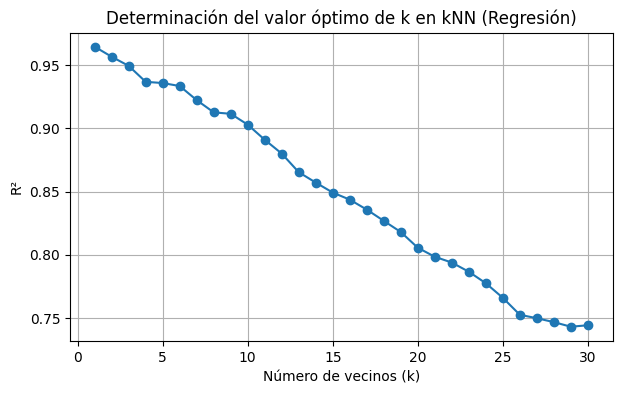

(1, 0.9646215689540975)

In [28]:
# Variable objetivo
y = df['dosage']
X = df_scaled

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Rango de k
k_values = range(1, 31)
r2_scores = []

# Entrenamiento y evaluación
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

# Gráfica k vs R²
plt.figure(figsize=(7, 4))
plt.plot(k_values, r2_scores, marker='o')
plt.xlabel("Número de vecinos (k)")
plt.ylabel("R²")
plt.title("Determinación del valor óptimo de k en kNN (Regresión)")
plt.grid(True)
plt.show()

# Mejor k
best_k = k_values[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

best_k, best_r2


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Calcula el error cuadrático medio.</li>
</ul>
</div>

In [29]:
# k óptimo encontrado
k_opt = 1

# Entrenar el modelo
knn_reg = KNeighborsRegressor(n_neighbors=k_opt)
knn_reg.fit(X_train, y_train)

# Predicción en test
y_pred = knn_reg.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("k óptimo:", k_opt)
print("MSE (Error cuadrático medio):", mse)
print("R^2 en test:", r2)

# (Opcional) comparar algunas predicciones vs reales
results = pd.DataFrame({
    "y_real": y_test.values[:10],
    "y_pred": y_pred[:10]
})
results

k óptimo: 1
MSE (Error cuadrático medio): 46.610037020384155
R^2 en test: 0.9646215689540975


,y_real,y_pred
0,10.00,10.00
1,10.00,5.00
2,50.00,50.00
3,100.00,100.00
4,6.25,3.13
5,1.00,0.01
6,100.00,100.00
7,50.00,50.00
8,1.56,6.25
9,50.00,50.00


El modelo kNN de regresión con k = 1 obtuvo un
𝑅^2=0.965, lo que indica que explica aproximadamente el 96.5% de la variabilidad de la variable objetivo. El error cuadrático medio (MSE = 46.61) muestra que, aunque el ajuste global es muy bueno, existen errores puntuales en valores pequeños, lo cual es esperable en kNN con 𝑘 bajo. En general, el modelo presenta un ajuste preciso y consistente, especialmente para valores grandes del objetivo.